In [1]:
# Unsupervised Learning
# - PCA Principal Component Analysis, dimensionality reduction
# - Clustering menggunakan K-Means Clustering

# Save dan Load model
# model yang sudah dibuat bisa kita save ke file terpisah, mirip module
# bisa kita load di notebook lain untuk dipakai
# model yang sudah kita latih, siap pakai

In [115]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.naive_bayes import GaussianNB

import pickle

In [3]:
# import data
data_breast = load_breast_cancer()

In [9]:
df_breast = pd.DataFrame(data_breast.data)

In [10]:
df_breast.columns = data_breast.feature_names

In [11]:
df_breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df_breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
df_breast["target"] = data_breast.target

In [14]:
data_breast.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
df_breast.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [16]:
df_breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [18]:
# kita bisa gunakan PCA untuk reduce dimensi datanya jadi 2 dimensi
# kita prep data dulu, perlu di scaling datanya supaya PCA nya akurat

features = df_breast.drop(columns=["target"])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [20]:
scaled_features.shape

(569, 30)

In [21]:
# buat dan fit model PCA
model_pca_breast = PCA(n_components=2) # 2 dimensi, jadi 2 component PCA
pca_breast = model_pca_breast.fit_transform(scaled_features)

In [25]:
df_pca_breast = pd.DataFrame(pca_breast)
df_pca_breast.columns = ["PC1", "PC2"]
df_pca_breast

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [38]:
# melihat PC1 dan PC2 terbuat dari berapa % masing masing fitur
df_pc_components = pd.DataFrame(model_pca_breast.components_)
df_pc_components.columns = data_breast.feature_names
df_pc_components.index = ["PC1", "PC2"]
df_pc_components

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


In [28]:
# melihat berapa % data kita bisa dijelaskan oleh PC1 dan PC2
model_pca_breast.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [29]:
model_pca_breast.explained_variance_ratio_.sum()

0.6324320765155944

<Figure size 432x288 with 0 Axes>

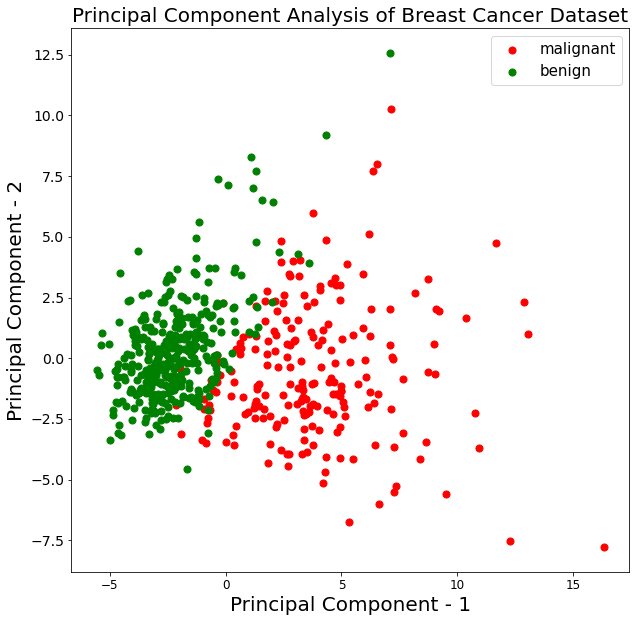

In [39]:
# gunakan PC1 dan PC2 untuk visualisasi data kita (569 pasien kaknker payudara)

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_breast['target'] == target
    plt.scatter(df_pca_breast.loc[indicesToKeep, 'PC1']
               , df_pca_breast.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(["malignant", "benign"],prop={'size': 15})

plt.show()
    

In [40]:
# import data heart.csv
# target (0 = sehat; 1 = sakit jantung)

df_heart = pd.read_csv("dataset/heart.csv")
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [41]:
# prep data, scaling

features = df_heart.drop(columns=["target"])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [51]:
# buat model PCA
model = PCA(n_components=13)
model_pca = model.fit_transform(features_scaled)

In [52]:
# lihat PC1 - PC13

df_pca = pd.DataFrame(model_pca)

column_names = []
for n in range(1, 14):
    column_names.append("PC" + str(n))

df_pca.columns = column_names

df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.522556,-1.112803,0.956816,-1.149198,-0.559252,-1.505052,0.071292,0.049732,0.872570,-0.417433,-0.558838,-0.356376,-0.117908
1,2.590381,-0.533162,1.467315,1.536614,1.345335,1.524630,1.469460,0.594801,-0.127561,-1.139650,-0.654299,-0.855773,0.281303
2,3.042352,-1.327521,-0.424765,1.567204,0.283814,-0.738182,0.378211,-1.397097,-0.836844,-0.450680,-0.519250,-0.896456,0.947188
3,-0.492522,-0.276720,0.801442,-0.984277,-0.487587,-1.438634,0.385833,-1.566671,0.085219,-0.425601,-0.989851,-0.243456,0.340277
4,2.187464,1.951477,-0.385539,0.295793,-2.386144,-0.563839,1.022689,1.682067,0.451377,-0.534908,-0.721091,1.069638,-0.614242
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,-0.762321,-0.512273,0.046672,-0.308011,-0.415454,0.083938,0.957084,-1.517729,-0.519319,1.051212,0.610329,-0.881262,0.535458
1021,2.374273,-0.940859,0.182370,-0.628459,0.822406,0.373266,-0.493855,0.086828,-0.050143,-0.110844,0.244407,-0.898288,-0.172621
1022,1.245073,-1.457356,-0.473873,-0.645240,-0.271197,1.786723,-0.623980,0.614532,-0.084198,0.611915,0.419160,0.765033,0.078441
1023,-1.620053,0.124443,-1.327956,-1.196804,-0.224913,1.263473,-0.498017,0.265437,0.345972,-1.100259,-0.319170,-0.188812,-0.386062


<AxesSubplot:>

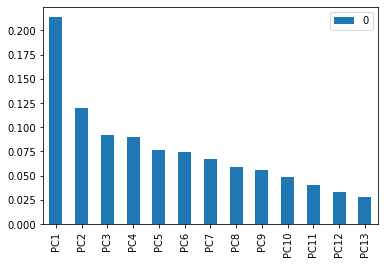

In [53]:
# seberapa berpengaruh setiap principal component ke penyebaran data kita?

pd.DataFrame(model.explained_variance_ratio_, index=column_names).plot(kind="bar")

In [54]:
model.explained_variance_ratio_.sum()

# di contoh ini, data kita ada 13 fitur, jadi kalau kita pakai 13 dimensi full, sudah pasti
# 100% perubahan data dapat kita jelaskan

1.0

In [58]:
# mau lihat PC terbuat dari berapa % masing2 fitur, kita bisa lihat

pd.DataFrame(model.components_, columns=features.columns, index=column_names)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
PC1,0.309574,0.078073,-0.285616,0.178760,0.127985,0.080713,-0.129490,-0.416970,0.363869,0.421781,-0.380108,0.265334,0.214070
PC2,0.398286,-0.379076,0.274947,0.438909,0.369819,0.321476,-0.244760,0.093830,-0.258613,-0.070527,0.064792,0.105858,-0.182619
PC3,-0.070616,0.618113,0.198286,0.154674,-0.251021,0.447107,-0.238472,0.197128,-0.050942,-0.044178,0.137898,0.319281,0.256048
PC4,-0.053975,-0.006604,0.403411,0.128736,-0.468203,0.176946,0.179450,-0.096199,-0.129796,0.322653,-0.481771,-0.219551,-0.352833
PC5,-0.290981,0.049592,0.188481,0.241707,0.305881,-0.233021,-0.274561,0.333954,0.017338,0.260365,-0.235783,-0.432391,0.416541
PC6,-0.204218,0.015825,-0.228271,-0.139863,-0.005674,0.280946,-0.632247,-0.056088,0.310502,-0.165167,-0.062540,-0.303059,-0.430212
PC7,-0.249728,-0.184611,-0.216087,0.310433,0.061741,0.517997,0.511241,0.165287,0.385981,-0.054706,0.085794,-0.174228,0.099910
PC8,-0.235570,-0.104707,0.122017,-0.622511,0.411463,0.361286,0.076549,0.139152,-0.135023,0.213249,-0.255842,0.277229,0.008056
PC9,-0.383547,-0.198855,-0.327642,0.289129,-0.154697,-0.224158,-0.115155,0.356564,-0.088739,0.247533,-0.035009,0.509161,-0.279659
PC10,-0.004413,0.546399,0.141045,0.144485,0.482187,-0.188297,0.251059,0.030142,0.193727,0.088694,0.080008,0.025494,-0.525653


<Figure size 432x288 with 0 Axes>

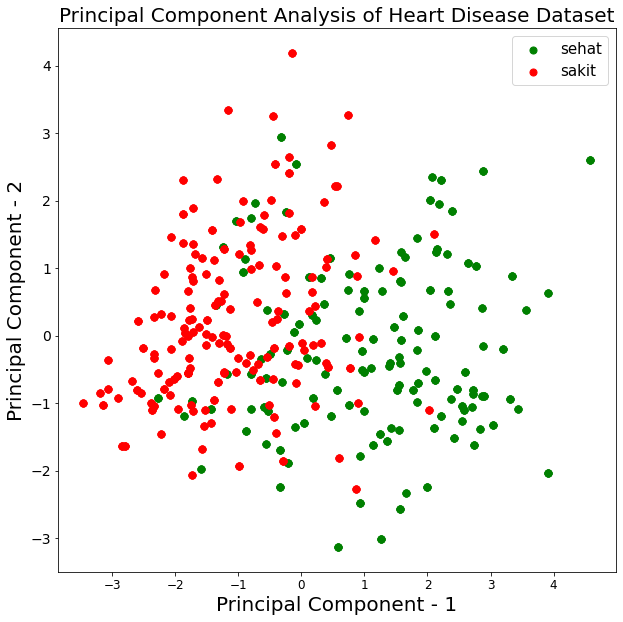

In [62]:
# optional - gunakan PC1 dan PC2 untuk visualisasi penyebaran data
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Heart Disease Dataset",fontsize=20)
targets = [0,1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = df_heart['target'] == target
    plt.scatter(df_pca.loc[indicesToKeep, 'PC1']
               , df_pca.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(["sehat", "sakit"],prop={'size': 15})

plt.show()

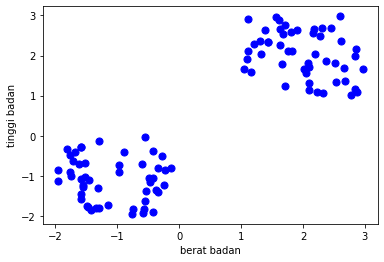

In [65]:
# Clustering
# import data
# gunakan data dummy

X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1

plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.xlabel("berat badan")
plt.ylabel("tinggi badan")
plt.show()

In [66]:
# prep data, scaling, encoding, missing values, kita anggap sudah ok

# buat model
model = KMeans(n_clusters=2)
model.fit(X)

print(model.inertia_)

61.784980109521406


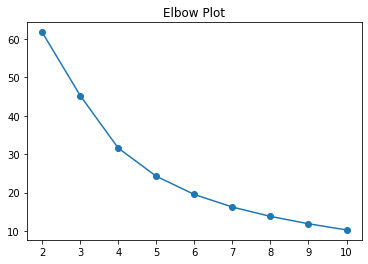

In [80]:
# model clustering nya kita coba untuk 1,2,3,... 10 cluster

clusters = range(2, 11)
inertias = []
for n in clusters:
    model = KMeans(n_clusters=n, init = 'k-means++')
    model.fit(X)

    inertias.append(model.inertia_)

plt.plot(clusters, inertias, marker="o")
plt.title("Elbow Plot")
plt.show()

In [81]:
# sepertinya 6 cluster paling cocok
# kita buat model KMeans dengan 6 cluster
model = KMeans(n_clusters=6)
model.fit(X)

print(model.inertia_)

19.270406465066703


In [82]:
# kita bisa lihat 6 titik centroid, untuk 6 cluster kita dimana saja lokasinya

model.cluster_centers_

array([[-1.08765305, -1.74247772],
       [ 1.36487156,  2.16653253],
       [-1.64820013, -0.75346823],
       [ 2.41756185,  1.51352317],
       [-0.48912436, -0.86560303],
       [ 2.03219212,  2.67828196]])

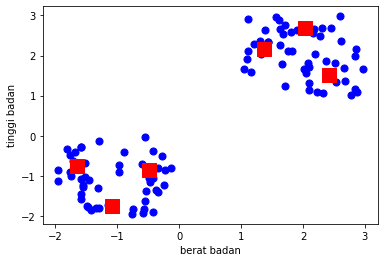

In [85]:
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')

for c in model.cluster_centers_:
    plt.scatter(c[0], c[1], s=200, c='r', marker='s')

plt.xlabel("berat badan")
plt.ylabel("tinggi badan")
plt.show()

In [89]:
df = pd.DataFrame(X)
df["label"] = model.labels_
df

,0,1,label
0,-0.979388,-0.901445,4
1,-0.495563,-1.064092,4
2,-0.577774,-1.924004,0
3,-0.539119,-1.387624,4
4,-0.763680,-1.950234,0
...,...,...,...
95,2.089233,1.133971,3
96,2.046381,1.567099,3
97,2.169438,2.557870,5
98,2.085723,1.821559,3


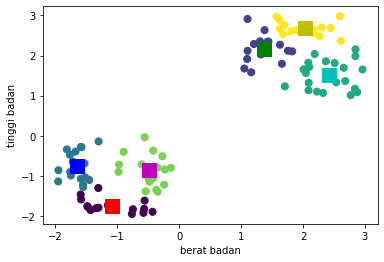

In [94]:
cdict = {0:"r", 1:"g", 2:"b", 3:"c", 4:"m", 5:"y"}

df["label"].replace(cdict)

plt.scatter(df[0], df[1], s = 50, c = df["label"])

index = 0
for c in model.cluster_centers_:
    plt.scatter(c[0], c[1], s=200, c=cdict[index], marker='s')
    index = index + 1

plt.xlabel("berat badan")
plt.ylabel("tinggi badan")
plt.show()

In [95]:
# kita coba lagi menggunakan Clustering
# untuk cari struktur dalam data, contohnya data wholesale ini:
# https://archive.ics.uci.edu/ml/datasets/wholesale+customers

data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [101]:
# pakai clustering untuk mencoba cari struktur data
# buat dan latih model KMeans

# bikin elbow method
clusters = range(2, 20)
inertias = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(data)

    inertias.append(model.inertia_)

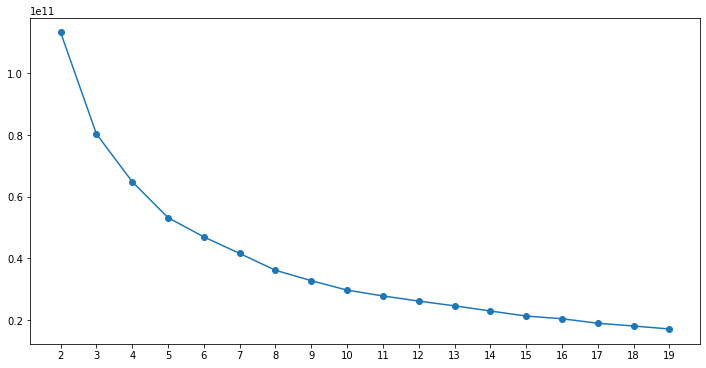

In [102]:
plt.figure(figsize=(12,6))
plt.plot(clusters, inertias, marker="o")
plt.xticks(clusters)
plt.show()

In [103]:
# misal kita set ke 10 cluster

model = KMeans(n_clusters=10)
model.fit(data)

inertias.append(model.inertia_)

In [105]:
df_customers = data.copy()
df_customers["label"] = model.labels_
df_customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,6
2,2,3,6353,8808,7684,2405,3516,7844,6
3,1,3,13265,1196,4221,6404,507,1788,3
4,2,3,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,2
438,1,3,10290,1981,2232,1038,168,2125,0


          Channel      Region
count  155.000000  155.000000
mean     1.058065    2.503226
std      0.234623    0.800764
min      1.000000    1.000000
25%      1.000000    2.000000
50%      1.000000    3.000000
75%      1.000000    3.000000
max      2.000000    3.000000


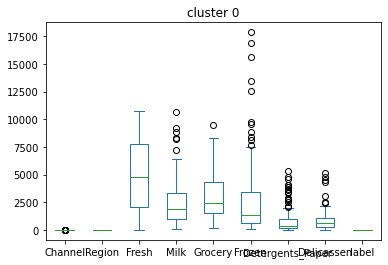

         Channel     Region
count  45.000000  45.000000
mean    1.155556   2.666667
std     0.366529   0.707107
min     1.000000   1.000000
25%     1.000000   3.000000
50%     1.000000   3.000000
75%     1.000000   3.000000
max     2.000000   3.000000


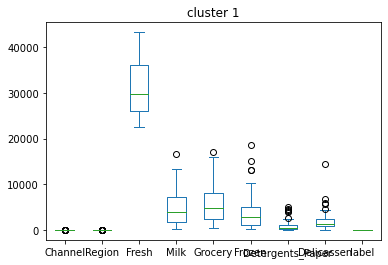

       Channel     Region
count     30.0  30.000000
mean       2.0   2.433333
std        0.0   0.817200
min        2.0   1.000000
25%        2.0   2.000000
50%        2.0   3.000000
75%        2.0   3.000000
max        2.0   3.000000


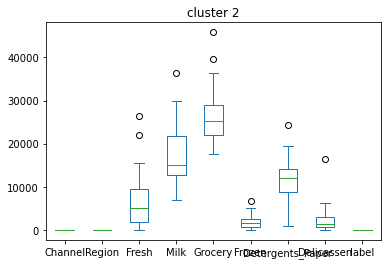

          Channel     Region
count  106.000000  106.00000
mean     1.207547    2.54717
std      0.407477    0.77006
min      1.000000    1.00000
25%      1.000000    2.00000
50%      1.000000    3.00000
75%      1.000000    3.00000
max      2.000000    3.00000


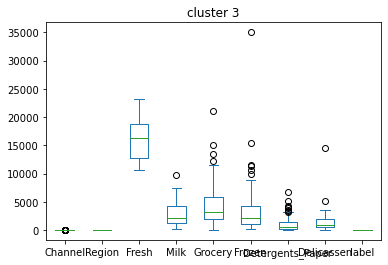

       Channel    Region
count      9.0  9.000000
mean       1.0  2.333333
std        0.0  1.000000
min        1.0  1.000000
25%        1.0  1.000000
50%        1.0  3.000000
75%        1.0  3.000000
max        1.0  3.000000


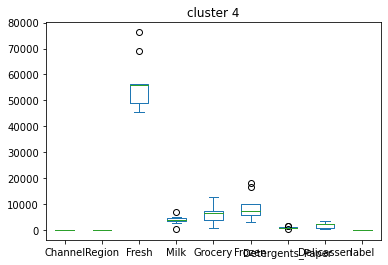

       Channel    Region
count      2.0  2.000000
mean       2.0  2.500000
std        0.0  0.707107
min        2.0  2.000000
25%        2.0  2.250000
50%        2.0  2.500000
75%        2.0  2.750000
max        2.0  3.000000


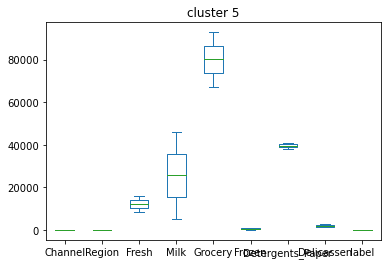

         Channel     Region
count  87.000000  87.000000
mean    1.793103   2.586207
std     0.407429   0.755626
min     1.000000   1.000000
25%     2.000000   2.500000
50%     2.000000   3.000000
75%     2.000000   3.000000
max     2.000000   3.000000


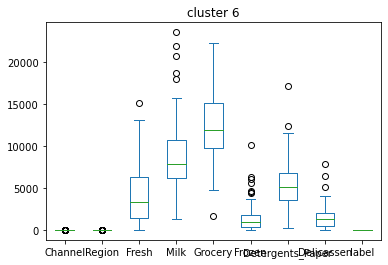

       Channel  Region
count      3.0     3.0
mean       2.0     3.0
std        0.0     0.0
min        2.0     3.0
25%        2.0     3.0
50%        2.0     3.0
75%        2.0     3.0
max        2.0     3.0


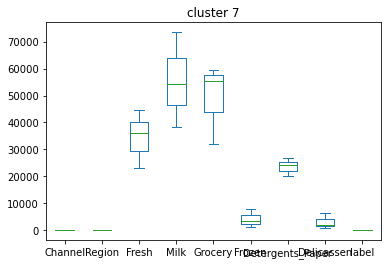

       Channel  Region
count      1.0     1.0
mean       1.0     3.0
std        NaN     NaN
min        1.0     3.0
25%        1.0     3.0
50%        1.0     3.0
75%        1.0     3.0
max        1.0     3.0


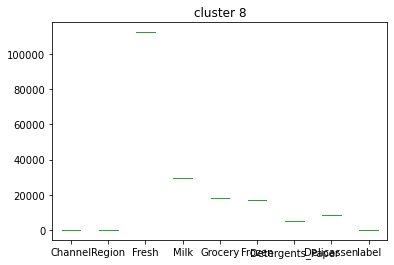

       Channel    Region
count      2.0  2.000000
mean       1.0  2.500000
std        0.0  0.707107
min        1.0  2.000000
25%        1.0  2.250000
50%        1.0  2.500000
75%        1.0  2.750000
max        1.0  3.000000


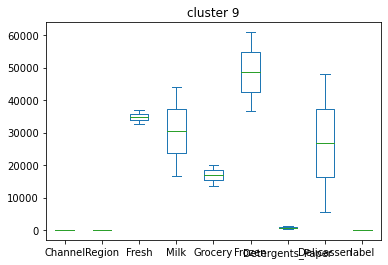

In [112]:
# per cluster, lihat box plot nya

for n in range(10):
    kelompok = df_customers[df_customers["label"] == n]
    kelompok.plot(kind="box")
    plt.title("cluster " + str(n))
    print(kelompok[["Channel", "Region"]].describe())
    plt.show()

In [114]:
# Save dan Load model yang sudah dibuat
# menggunakan Pickle

# import data
# rapiin data
# buat dan latih model
# import data
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

# prep data
le = LabelEncoder()

weather_en = le.fit_transform(weather)
print(le.classes_)

temp_en = le.fit_transform(temp)
print(le.classes_)

play_en = le.fit_transform(play)
print(le.classes_)

df_play = pd.DataFrame({"weather":weather_en, "temp":temp_en, "play":play_en})

# fitur dan target
fitur = pd.DataFrame({"weather":weather_en, "temp":temp_en})
target = play_en

# membuat dan melatih model
model = GaussianNB()
model.fit(fitur, target)

['Overcast' 'Rainy' 'Sunny']
['Cool' 'Hot' 'Mild']
['No' 'Yes']


GaussianNB()

In [116]:
# model mau kita pakai di tempat lain, website, atau apps, atau bikin prediksi
# kita bisa save model nya ke sebuah file terpisah
filename = 'gaussian_play.pkl'
pickle.dump(model, open(filename, 'wb'))